# 多項式回帰

## ライブラリーのインポート

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


## データセットのインポート

In [177]:
# データセットをロード
dataset = datasets.fetch_california_housing()

# 一意なクラスラベルを出力
print('特徴量:', dataset.feature_names)

特徴量: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## データセットの確認

In [178]:
pd.set_option('display.max_columns', None)
# データセットの特徴量をDataFrameに変換
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# 目標変数をDataFrameに追加
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [179]:
print(f'データの形式：{df.shape}')
print(f'欠損値の数：{df.isnull().sum().sum()}')

データの形式：(20640, 9)
欠損値の数：0


## 相関関係の確認

In [180]:
corr_matrix = df.corr() # 相関行列を計算

# "target"との相関が高い順に列を並び替える
sorted_columns = corr_matrix.abs().sort_values('target', ascending=False).index

# 並び替えた列順でDataFrameの相関行列を表示
sorted_corr_matrix = corr_matrix[sorted_columns].loc[sorted_columns]
sorted_corr_matrix

,target,MedInc,AveRooms,Latitude,HouseAge,AveBedrms,Longitude,Population,AveOccup
target,1.000000,0.688075,0.151948,-0.144160,0.105623,-0.046701,-0.045967,-0.024650,-0.023737
MedInc,0.688075,1.000000,0.326895,-0.079809,-0.119034,-0.062040,-0.015176,0.004834,0.018766
AveRooms,0.151948,0.326895,1.000000,0.106389,-0.153277,0.847621,-0.027540,-0.072213,-0.004852
Latitude,-0.144160,-0.079809,0.106389,1.000000,0.011173,0.069721,-0.924664,-0.108785,0.002366
HouseAge,0.105623,-0.119034,-0.153277,0.011173,1.000000,-0.077747,-0.108197,-0.296244,0.013191
AveBedrms,-0.046701,-0.062040,0.847621,0.069721,-0.077747,1.000000,0.013344,-0.066197,-0.006181
Longitude,-0.045967,-0.015176,-0.027540,-0.924664,-0.108197,0.013344,1.000000,0.099773,0.002476
Population,-0.024650,0.004834,-0.072213,-0.108785,-0.296244,-0.066197,0.099773,1.000000,0.069863
AveOccup,-0.023737,0.018766,-0.004852,0.002366,0.013191,-0.006181,0.002476,0.069863,1.000000


## 説明変数と目的変数に分割

In [189]:
# 相関関係の高い特徴量を抽出
select_features = ['MedInc']
X = df.loc[:1000, select_features].values #説明のため1000としている
y = df.loc[:1000, 'target'].values
print(X)
print(y)

[[8.3252]
 [8.3014]
 [7.2574]
 ...
 [5.4324]
 [4.9375]
 [3.3841]]
[4.526 3.585 3.521 ... 2.155 2.277 1.844]


## データ集合全体によるモデルの学習

In [190]:
# 多項式回帰のインスタンスを作成
poly_reg = PolynomialFeatures(degree=3)
# 新しい特徴量を作成
x_poly = poly_reg.fit_transform(X)

In [191]:
# 単回帰のインスタンスを作成
lin_reg = LinearRegression()
# データ集合全体をモデルに適合させる
lin_reg.fit(x_poly,y)

LinearRegression()

## 新しいデータポイントでの予測

In [192]:
# 新しいデータポイントで予測
new_data = [[8.0]]
pred_label = lin_reg.predict(poly_reg.fit_transform(new_data))[0]
print(f'予測した{dataset.target_names}の値: {pred_label:.3f}')

予測した['MedHouseVal']の値: 3.865


## テストデータで予測

In [193]:
# テストデータで予測を実施
y_pred = lin_reg.predict(x_poly)

## モデルの性能評価

In [194]:
# MSEの計算(0に近いほど良いとされている)
print(f'MSE: {mean_squared_error(y, y_pred):.3f}' )

# R^2を計算(1に近いほど良いとされている,0に近いほど悪い,符の値は浮上に悪いモデル)
print(f'R^2: {r2_score(y, y_pred):.3f}')


MSE: 0.317
R^2: 0.599


## 性能評価の可視化

In [196]:
# グリッドポイントの生成
x_grid = np.arange(min(X), max(X), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

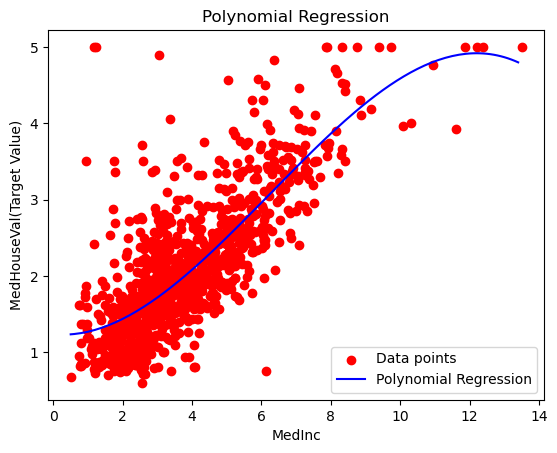

In [197]:
# プロットの作成
plt.scatter(X, y, color='red', label='Data points')
plt.plot(x_grid, lin_reg.predict(poly_reg.fit_transform(x_grid)), color='blue', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel(f'{select_features[0]}')
plt.ylabel(f'{dataset.target_names[0]}(Target Value)')

# グリッドの生成
X1_min, X1_max = X.min() - 1, X.max() + 1
X2_min, X2_max = y.min() - 1, y.max() + 1
X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, 0.1), np.arange(X2_min, X2_max, 0.1))

plt.legend()
plt.show()